In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df = pd.read_csv('design_sweep_1609192923.csv')
df.head()

,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress
0,Clark - Y,4.000,1.0,0.015,0.018,0.12660228720332348,2271769.3723867964
1,Clark - Y,4.125,1.0,0.015,0.016,0.12630371350891367,2595366.7914017923
2,Clark - Y,4.250,1.0,0.015,0.016,0.12603553599973394,2634397.0535795367
3,Clark - Y,4.375,1.0,0.015,0.016,0.12579328388717442,2672857.439128741
4,Clark - Y,4.500,1.0,0.015,0.016,0.12557337511530936,2710772.2043549074


In [43]:
df=df.dropna(how='any')
df.shape

(816, 7)

In [44]:
df = df[df['BatteryMass'] != 'SPAR FAIL']
df = df[df['Aerofoil'] != 'RG15 (C)']
print(df.shape)
df.head()

(315, 7)


,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress
0,Clark - Y,4.000,1.0,0.015,0.018,0.12660228720332348,2271769.3723867964
1,Clark - Y,4.125,1.0,0.015,0.016,0.12630371350891367,2595366.7914017923
2,Clark - Y,4.250,1.0,0.015,0.016,0.12603553599973394,2634397.0535795367
3,Clark - Y,4.375,1.0,0.015,0.016,0.12579328388717442,2672857.439128741
4,Clark - Y,4.500,1.0,0.015,0.016,0.12557337511530936,2710772.2043549074


In [45]:
numeric_cols = ['AR','TaperRatio','SparHeight','SparWidth','BatteryMass','MaxStress']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [46]:
SF = 1.5
failure_stress = 4.4908e6 / SF 

df['WithinConstraints'] = df['MaxStress'] < failure_stress
df.head()

,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress,WithinConstraints
0,Clark - Y,4.000,1.0,0.015,0.018,0.126602,2.271769e+06,True
1,Clark - Y,4.125,1.0,0.015,0.016,0.126304,2.595367e+06,True
2,Clark - Y,4.250,1.0,0.015,0.016,0.126036,2.634397e+06,True
3,Clark - Y,4.375,1.0,0.015,0.016,0.125793,2.672857e+06,True
4,Clark - Y,4.500,1.0,0.015,0.016,0.125573,2.710772e+06,True


In [47]:
failure_stress

2993866.6666666665

In [48]:
sorted_df=df.sort_values('BatteryMass', ascending=True)[df['WithinConstraints'] == 1]

C:\Users\paras\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [49]:
sorted_df.head(n=20)

,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress,WithinConstraints
60,Falcon-56 MkII,5.500,1.0,0.015,0.018,0.102593,2.663886e+06,True
59,Falcon-56 MkII,5.375,1.0,0.015,0.018,0.102750,2.633440e+06,True
58,Falcon-56 MkII,5.250,1.0,0.015,0.018,0.102918,2.602639e+06,True
57,Falcon-56 MkII,5.125,1.0,0.015,0.018,0.103098,2.571468e+06,True
56,Falcon-56 MkII,5.000,1.0,0.015,0.018,0.103291,2.539915e+06,True
55,Falcon-56 MkII,4.875,1.0,0.015,0.020,0.103498,2.257169e+06,True
54,Falcon-56 MkII,4.750,1.0,0.020,0.010,0.103721,2.506548e+06,True
53,Falcon-56 MkII,4.625,1.0,0.020,0.020,0.103962,1.236674e+06,True
52,Falcon-56 MkII,4.500,1.0,0.020,0.020,0.104222,1.219847e+06,True
51,Falcon-56 MkII,4.375,1.0,0.020,0.022,0.104504,1.093442e+06,True


In [57]:
sorted_df['pcdiff'] = 100*(1- sorted_df['BatteryMass']/sorted_df['BatteryMass'][60])
sorted_df.head(30)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(sorted_df)

,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress,WithinConstraints,pcdiff
60,Falcon-56 MkII,5.500,1.0,0.015,0.018,0.102593,2.663886e+06,True,0.000000
59,Falcon-56 MkII,5.375,1.0,0.015,0.018,0.102750,2.633440e+06,True,-0.153550
58,Falcon-56 MkII,5.250,1.0,0.015,0.018,0.102918,2.602639e+06,True,-0.317518
57,Falcon-56 MkII,5.125,1.0,0.015,0.018,0.103098,2.571468e+06,True,-0.492912
56,Falcon-56 MkII,5.000,1.0,0.015,0.018,0.103291,2.539915e+06,True,-0.680881
55,Falcon-56 MkII,4.875,1.0,0.015,0.020,0.103498,2.257169e+06,True,-0.882739
54,Falcon-56 MkII,4.750,1.0,0.020,0.010,0.103721,2.506548e+06,True,-1.100003
53,Falcon-56 MkII,4.625,1.0,0.020,0.020,0.103962,1.236674e+06,True,-1.334434
52,Falcon-56 MkII,4.500,1.0,0.020,0.020,0.104222,1.219847e+06,True,-1.588089
51,Falcon-56 MkII,4.375,1.0,0.020,0.022,0.104504,1.093442e+06,True,-1.863398


NameError: name 'df_refined' is not defined

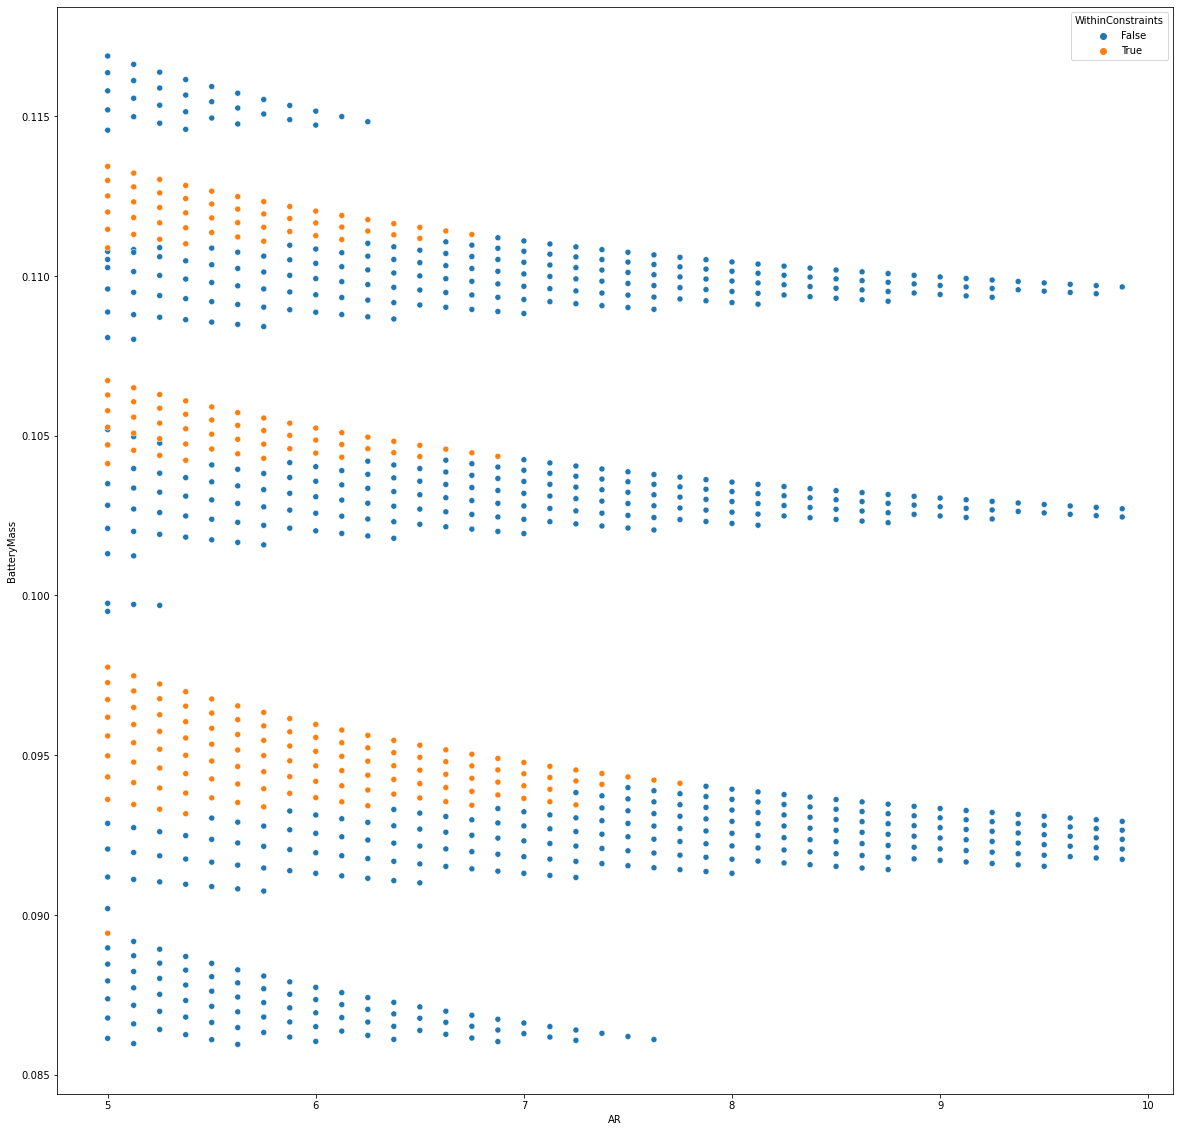

In [11]:
fig=plt.figure(figsize=(20,20))
sns.scatterplot(x='AR',y='BatteryMass',hue='WithinConstraints',data=df)
sns.scatterplot(x='AR',y='BatteryMass',hue='WithinConstraints',data=df_refined)
plt.legend(loc='upper left',bbox_to_anchor=(1.01,1.01))


C:\Users\paras\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\paras\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\paras\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\paras\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\paras\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\paras\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

<Figure size 1440x1440 with 0 Axes>

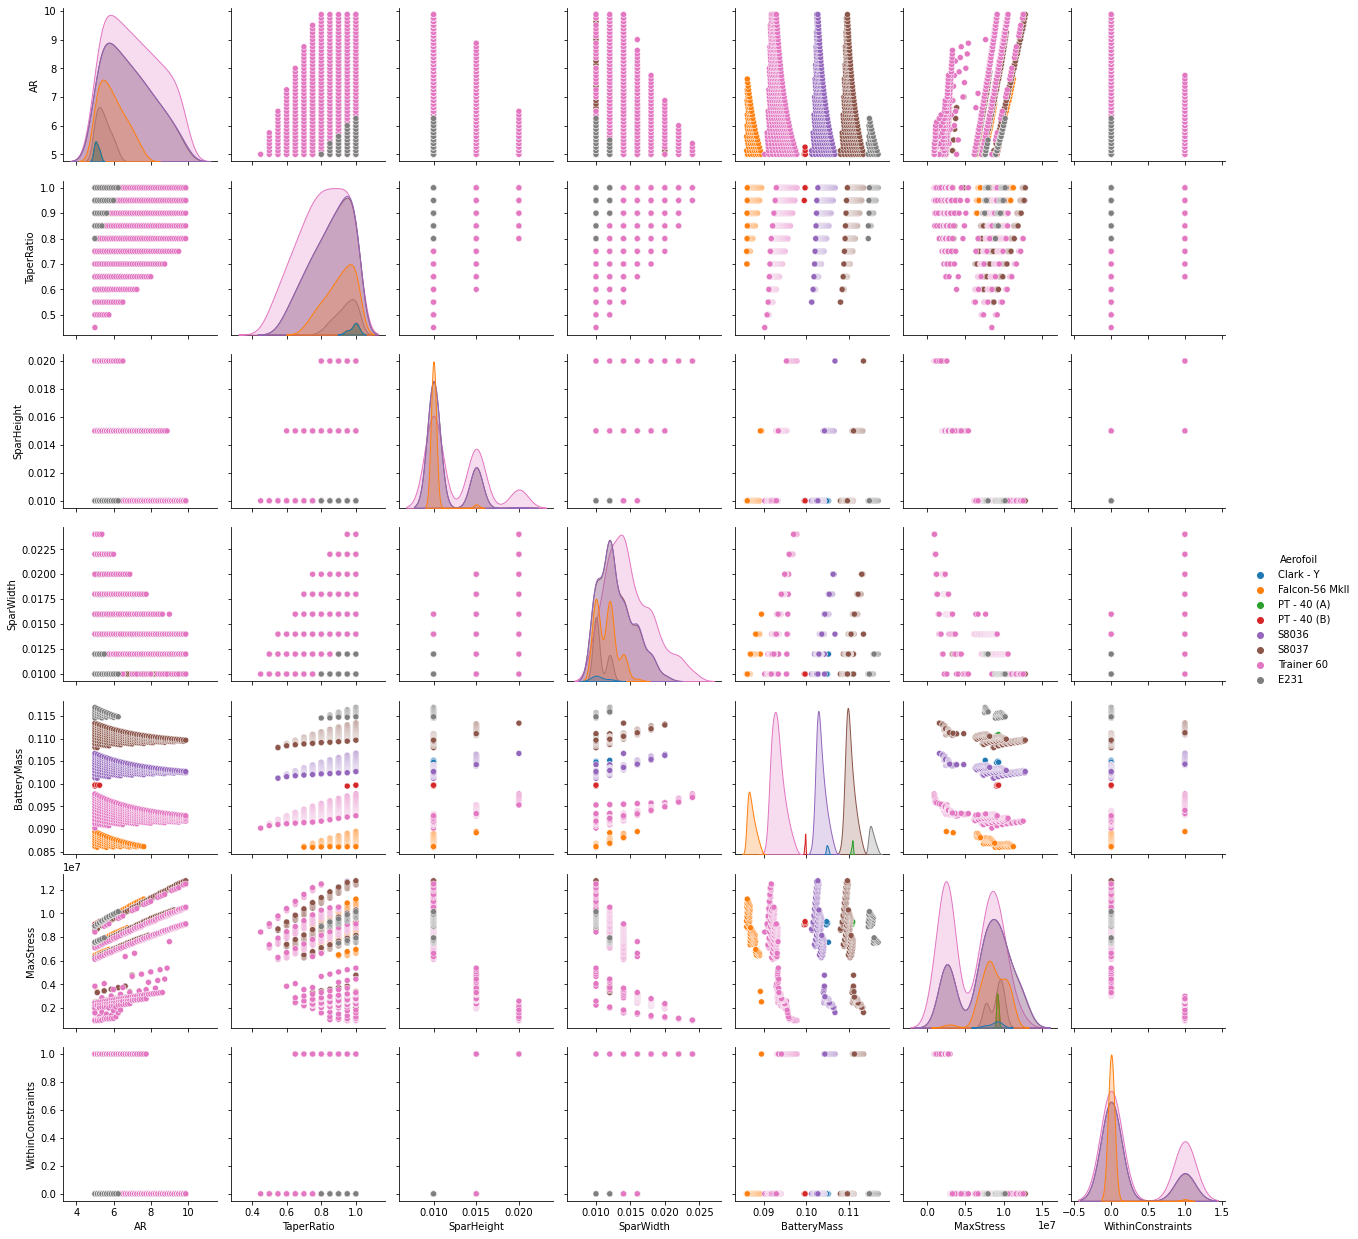

In [12]:
fig=plt.figure(figsize=(20,20))
sns.pairplot(data=df,hue='Aerofoil')
# plt.legend(loc='upper left',bbox_to_anchor=(1.01,1.01))

No handles with labels found to put in legend.


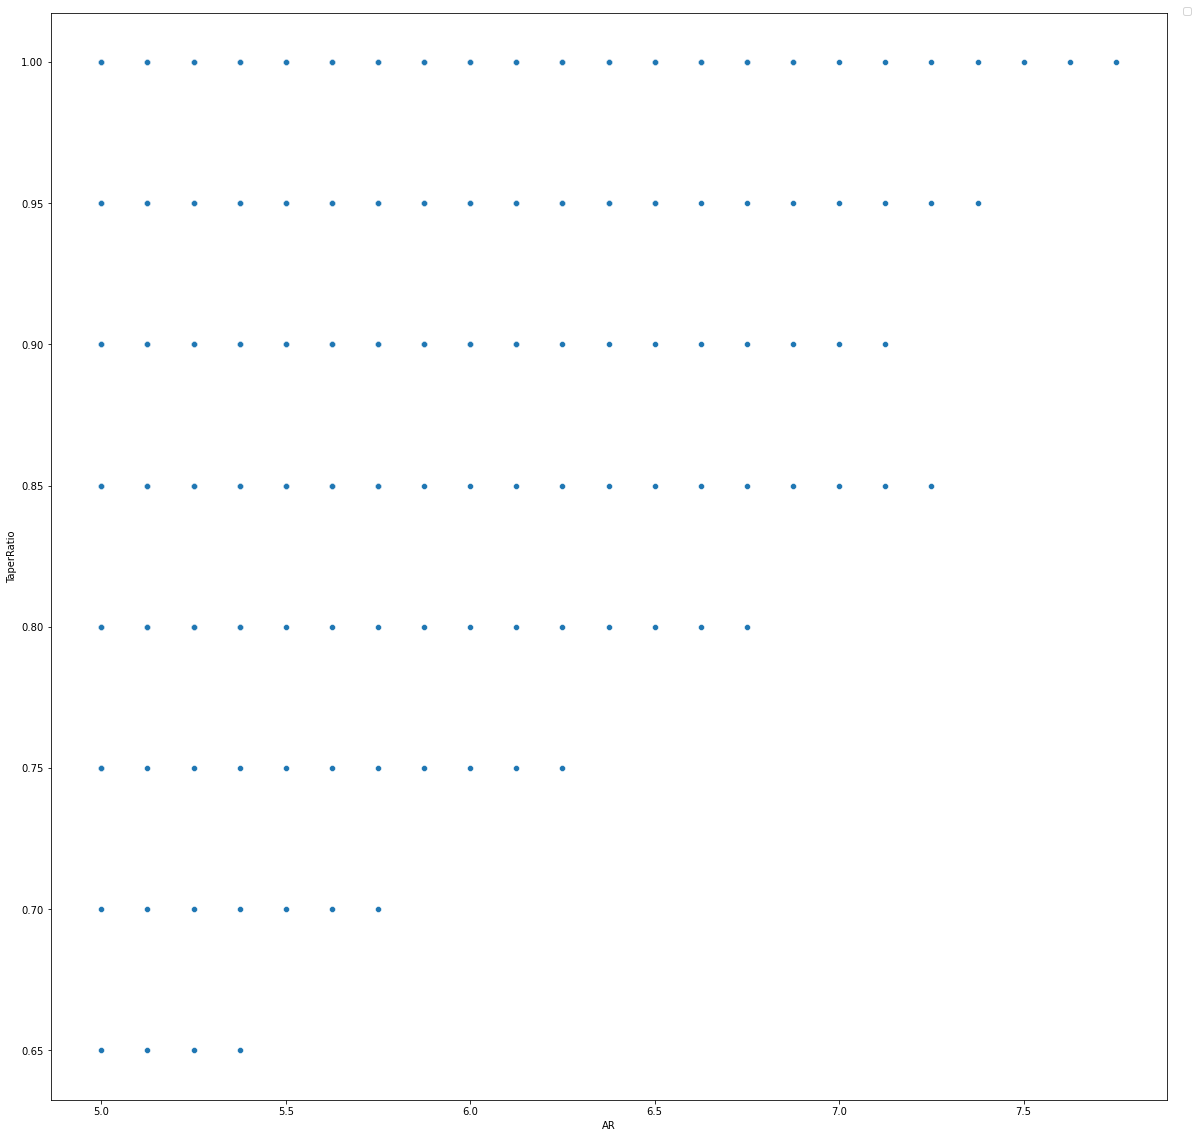

In [13]:
fig=plt.figure(figsize=(20,20))
sns.scatterplot(x='AR',y='TaperRatio',data=df[df['WithinConstraints']==1])
# sns.scatterplot(x='AR',y='TaperRatio',data=df_refined[df_refined['WithinConstraints']==1])
plt.legend(loc='upper left',bbox_to_anchor=(1.01,1.01))

In [30]:
df_refined = pd.read_csv('design_sweep_1609093982.csv')
df_refined.head()

,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress
0,E472,5.0,0.250,0.00,0.00,SPAR FAIL,SPAR FAIL
1,E472,5.0,0.275,0.00,0.00,SPAR FAIL,SPAR FAIL
2,E472,5.0,0.300,0.01,0.01,0.04871586208942182,7580687.251104259
3,E472,5.0,0.325,0.01,0.01,0.048933233009343644,7627106.475577868
4,E472,5.0,0.350,0.01,0.01,0.0491581850418262,7671806.469515417


In [32]:
df_refined = df_refined[df_refined['BatteryMass'] != 'SPAR FAIL']
print(df_refined.shape)
df_refined.head()

(1001, 7)


,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress
2,E472,5.0,0.300,0.010,0.010,0.04871586208942182,7580687.251104259
3,E472,5.0,0.325,0.010,0.010,0.048933233009343644,7627106.475577868
4,E472,5.0,0.350,0.010,0.010,0.0491581850418262,7671806.469515417
5,E472,5.0,0.375,0.012,0.010,0.04938244912632126,5357556.256338866
6,E472,5.0,0.400,0.012,0.012,0.04960750051644601,4488667.345095937


In [33]:
numeric_cols = ['AR','TaperRatio','SparHeight','SparWidth','BatteryMass','MaxStress']
df_refined[numeric_cols] = df_refined[numeric_cols].apply(pd.to_numeric)

In [34]:
df_refined['WithinConstraints'] = df_refined['MaxStress'] < failure_stress
df_refined.head()

,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress,WithinConstraints
2,E472,5.0,0.300,0.010,0.010,0.048716,7.580687e+06,False
3,E472,5.0,0.325,0.010,0.010,0.048933,7.627106e+06,False
4,E472,5.0,0.350,0.010,0.010,0.049158,7.671806e+06,False
5,E472,5.0,0.375,0.012,0.010,0.049382,5.357556e+06,False
6,E472,5.0,0.400,0.012,0.012,0.049608,4.488667e+06,False


In [35]:
sorted_df_refined=df_refined.sort_values('BatteryMass', ascending=True)[df_refined['WithinConstraints'] == 1]

C:\Users\paras\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [36]:
sorted_df_refined.head(n=20)

,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress,WithinConstraints
1084,E472,9.250,1.000,0.016,0.016,0.045192,2.803232e+06,True
1021,E472,9.000,0.975,0.016,0.016,0.045312,2.758461e+06,True
1053,E472,9.125,1.000,0.016,0.016,0.045348,2.784227e+06,True
958,E472,8.750,0.950,0.016,0.016,0.045474,2.713174e+06,True
990,E472,8.875,0.975,0.016,0.016,0.045477,2.739238e+06,True
1022,E472,9.000,1.000,0.016,0.016,0.045509,2.765091e+06,True
831,E472,8.250,0.875,0.016,0.014,0.045635,2.987360e+06,True
895,E472,8.500,0.925,0.016,0.016,0.045635,2.667353e+06,True
959,E472,8.750,0.975,0.016,0.016,0.045647,2.719879e+06,True
927,E472,8.625,0.950,0.016,0.016,0.045648,2.693725e+06,True


In [41]:
sorted_df.head(25)

,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress,WithinConstraints
697,E472,7,0.70,0.0150,0.0150,0.046458,2.860600e+06,True
718,E472,8,0.95,0.0150,0.0175,0.046614,2.698721e+06,True
698,E472,7,0.75,0.0150,0.0150,0.046863,2.879445e+06,True
719,E472,8,1.00,0.0175,0.0125,0.047011,2.789376e+06,True
699,E472,7,0.80,0.0150,0.0150,0.047263,2.897242e+06,True
700,E472,7,0.85,0.0150,0.0175,0.047683,2.497781e+06,True
701,E472,7,0.90,0.0175,0.0150,0.048103,2.152673e+06,True
680,E472,6,0.65,0.0150,0.0150,0.048466,2.629897e+06,True
702,E472,7,0.95,0.0175,0.0175,0.048517,1.854678e+06,True
681,E472,6,0.70,0.0150,0.0150,0.048904,2.648401e+06,True


In [52]:
sorted_df_refined['pcdiff'] = 100*(1- sorted_df_refined['BatteryMass']/sorted_df_refined['BatteryMass'][1084])
sorted_df_refined.head(30)

,Aerofoil,AR,TaperRatio,SparHeight,SparWidth,BatteryMass,MaxStress,WithinConstraints,pcdiff
1084,E472,9.250,1.000,0.016,0.016,0.045192,2.803232e+06,True,0.000000
1021,E472,9.000,0.975,0.016,0.016,0.045312,2.758461e+06,True,-0.266926
1053,E472,9.125,1.000,0.016,0.016,0.045348,2.784227e+06,True,-0.345892
958,E472,8.750,0.950,0.016,0.016,0.045474,2.713174e+06,True,-0.623773
990,E472,8.875,0.975,0.016,0.016,0.045477,2.739238e+06,True,-0.631049
1022,E472,9.000,1.000,0.016,0.016,0.045509,2.765091e+06,True,-0.702829
831,E472,8.250,0.875,0.016,0.014,0.045635,2.987360e+06,True,-0.980951
895,E472,8.500,0.925,0.016,0.016,0.045635,2.667353e+06,True,-0.981002
959,E472,8.750,0.975,0.016,0.016,0.045647,2.719879e+06,True,-1.007130
927,E472,8.625,0.950,0.016,0.016,0.045648,2.693725e+06,True,-1.009604
